In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from beakerx import * 
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

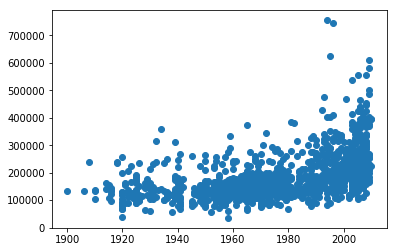

In [5]:
plt.scatter(train['GarageYrBlt'],train['SalePrice'])

In [6]:
train['GarageYrBlt'].fillna(0,inplace=True)

In [7]:
def age(x):
    if x>=1980:
        return 'NEW'
    elif x>=1940:
        return 'OLD'
    elif x>=1900:
        return 'VERY OLD'
    else:
        return np.NAN

In [8]:
train['GarageYrBlt']=train['GarageYrBlt'].apply(age)

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x=pd.get_dummies(train.select_dtypes(include=['object']))
pca.fit(x)
x_reduced=pca.transform(x)

In [10]:
train.select_dtypes(include=['object']).shape

(1460, 44)

In [11]:
x.shape

(1460, 255)

In [12]:
x_reduced.shape

(1460, 96)

In [13]:
train.drop(train.select_dtypes(include=['object']).columns,axis=1,inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [15]:
train.fillna(0,inplace=True)

In [16]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
temp=pd.DataFrame(x_reduced)

In [18]:
train[temp.columns]=temp

In [19]:
train.set_index('Id',inplace=True)

In [20]:
cor=train.corrwith(train['SalePrice'])

In [21]:
less=cor[cor<0.05]
less=less[less>-0.05]

In [22]:
less.index

Index([  'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',    '3SsnPorch',
            'MiscVal',       'MoSold',       'YrSold',              5,
                    6,              7,              8,             10,
                   12,             13,             14,             16,
                   17,             21,             23,             26,
                   27,             29,             30,             31,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             45,             46,             47,
                   48,             49,             50,             51,
                   52,             54,             55,             56,
                   58,             59,             61,             62,
                   63,             64,             65,             66,
                   67,             68,             69,             70,
      

In [23]:
train.drop(less.index,axis=1,inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 56 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
O

In [25]:
test=pd.read_csv('test.csv')

In [26]:
test['GarageYrBlt'].fillna(0,inplace=True)

In [27]:
test['GarageYrBlt']=test['GarageYrBlt'].apply(age)

In [28]:
x_reducedT=pca.transform(x)

In [29]:
test.drop(test.select_dtypes(include=['object']).columns,axis=1,inplace=True)

In [30]:
test.fillna(0,inplace=True)

In [31]:
temp=pd.DataFrame(x_reducedT)

In [32]:
test[temp.columns]=temp

In [33]:
test.set_index('Id',inplace=True)

In [34]:
test.drop(less.index,axis=1,inplace=True)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 55 columns):
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
Fireplaces       1459 non-null int64
GarageCars       1459 non-null float64
GarageArea       1459 non-null float64
WoodDeckSF       1459 n

In [36]:
train.to_csv('trainC.csv')
test.to_csv('testC.csv')